<a href="https://colab.research.google.com/github/Mahajan2023/DS-projects/blob/Masters/Diabetes_Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib. pyplot as plt
%matplotlib inline



In [2]:
df= pd.read_csv('/content/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

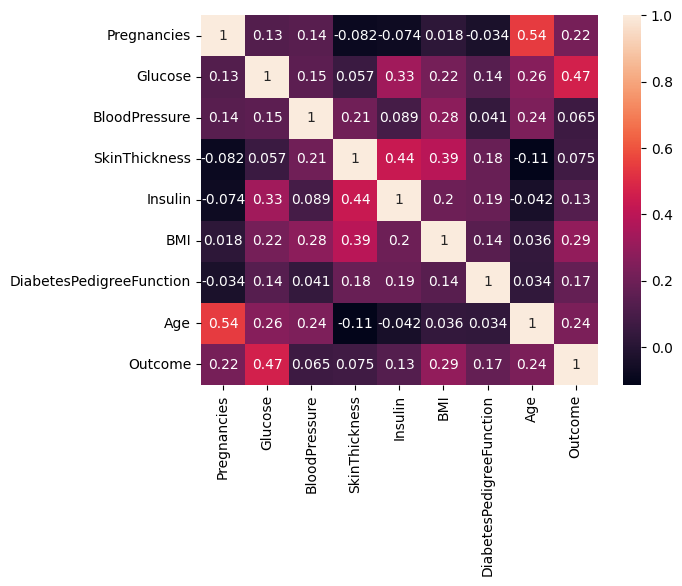

In [8]:
sns.heatmap(df.corr(),annot= True)

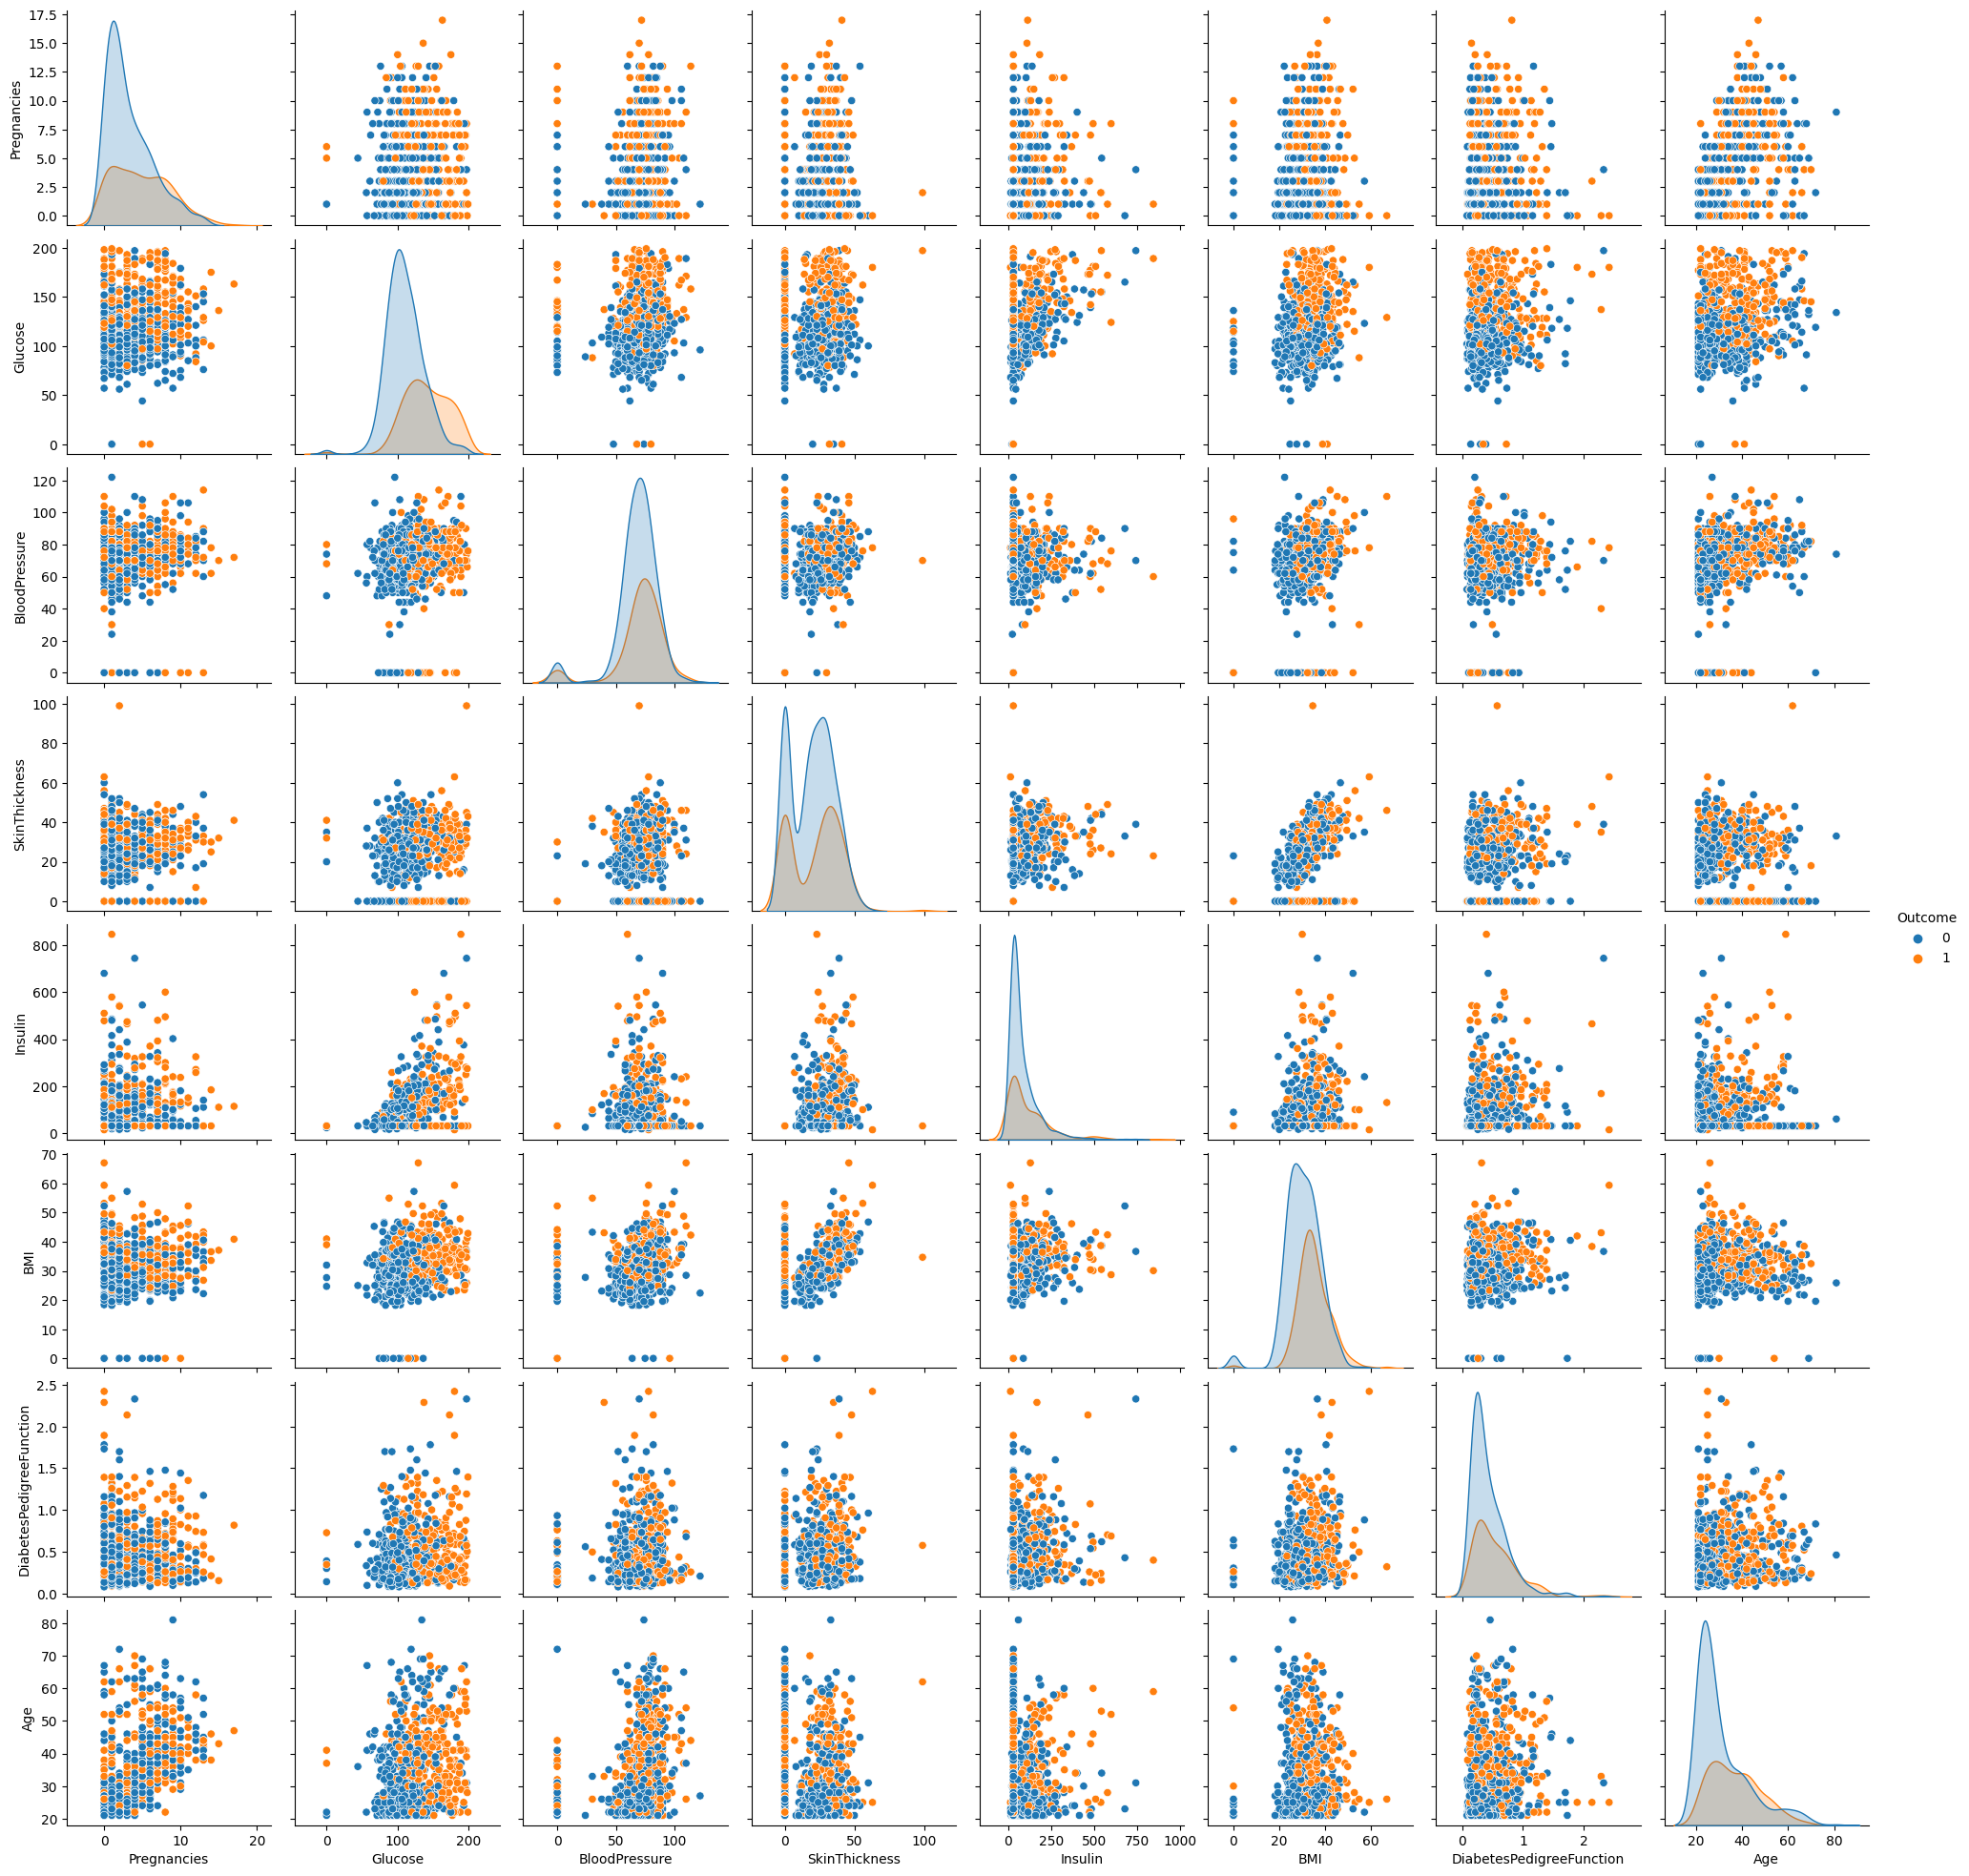

In [58]:
sns.pairplot(df,hue='Outcome')

<Axes: >

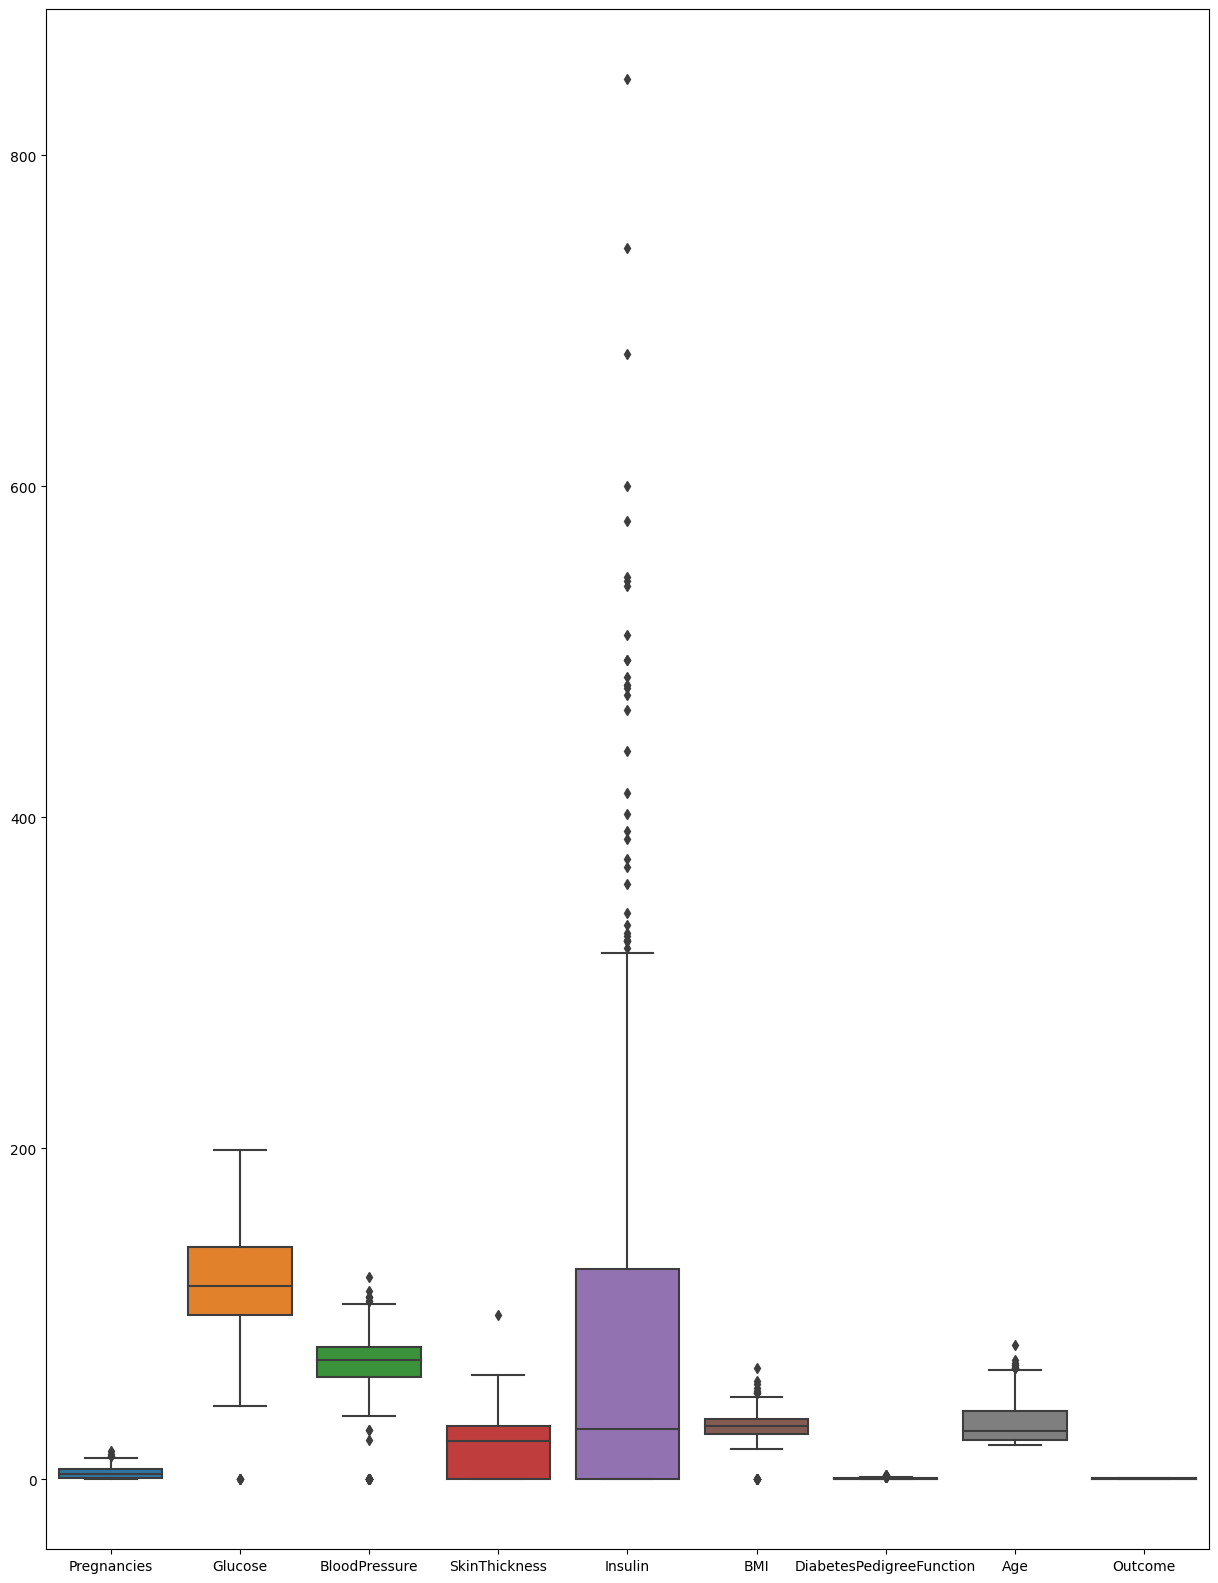

In [10]:
fig,ax =plt.subplots(figsize=(15,20))
sns.boxplot(data = df,ax=ax)

In [11]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())

In [12]:
df.Insulin[df['Insulin'] ==0].value_counts()

Series([], Name: Insulin, dtype: int64)

In [13]:
df.Pregnancies[df['Pregnancies'] ==0].value_counts()

0    111
Name: Pregnancies, dtype: int64

<ipython-input-14-527cbf673b18>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


<Axes: ylabel='Density'>

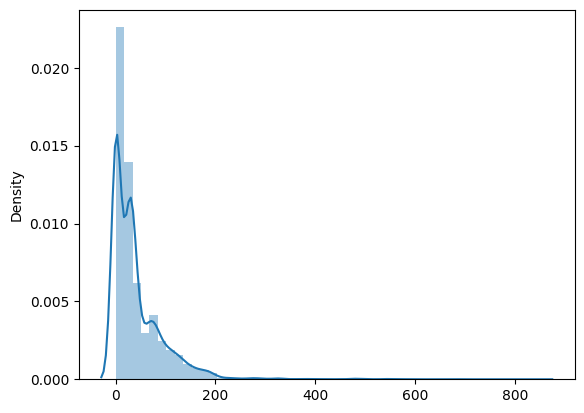

In [14]:
sns.distplot(df)

In [16]:
## Splitand e data set into independt dependent features

x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,0,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,0,30.5,30.1,0.349,47


In [18]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [30]:
x_train.shape

(430, 8)

In [31]:
y_train.shape

(430,)

In [32]:
x_test.shape

(338, 8)

In [33]:
y_test.shape

(338,)

In [21]:
from sklearn. model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.44,random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
l= LogisticRegression()

In [34]:
l.fit(x_train,y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred=l.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
print(confusion_matrix(y_test,y_pred))

[[190  34]
 [ 42  72]]


In [40]:
correct=190+72

In [41]:
(correct/338)*100

77.51479289940828

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
myknn=KNeighborsClassifier(n_neighbors=5)

In [48]:
myknn.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
y_pred=myknn.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
print(confusion_matrix(y_test,y_pred))

[[180  44]
 [ 49  65]]


In [53]:
correct=180+65

In [55]:
(correct/338)*100

72.48520710059172

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       224
           1       0.60      0.57      0.58       114

    accuracy                           0.72       338
   macro avg       0.69      0.69      0.69       338
weighted avg       0.72      0.72      0.72       338



In [61]:
error_rate=[]

In [62]:
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i= knn.predict(x_test)
  error_rate.append(np.mean(pred_i != y_test))

In [64]:
error_rate

[0.28402366863905326,
 0.2781065088757396,
 0.2958579881656805,
 0.28402366863905326,
 0.27514792899408286,
 0.27218934911242604,
 0.2781065088757396,
 0.2692307692307692,
 0.2692307692307692,
 0.257396449704142,
 0.27218934911242604,
 0.2603550295857988,
 0.28106508875739644,
 0.2781065088757396,
 0.27514792899408286,
 0.2781065088757396,
 0.27218934911242604,
 0.2692307692307692,
 0.27514792899408286,
 0.2869822485207101,
 0.2781065088757396,
 0.2781065088757396,
 0.27218934911242604,
 0.257396449704142,
 0.257396449704142,
 0.2514792899408284,
 0.2455621301775148,
 0.2514792899408284,
 0.2485207100591716,
 0.27514792899408286,
 0.2692307692307692,
 0.26627218934911245,
 0.2692307692307692,
 0.2692307692307692,
 0.2603550295857988,
 0.26627218934911245,
 0.2514792899408284,
 0.25443786982248523,
 0.25443786982248523]

Text(0, 0.5, 'error_rate')

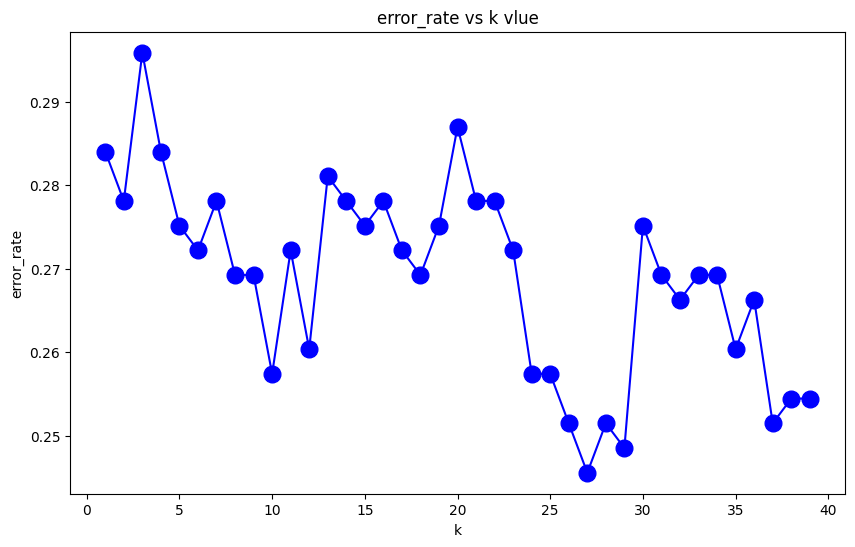

In [66]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',marker='o',markersize=12)
plt.title('error_rate vs k vlue')
plt.xlabel('k')
plt.ylabel('error_rate')

In [67]:
from sklearn.svm import SVC

In [68]:
Classifier=SVC()

In [70]:
Classifier.fit(x_train,y_train)

SVC()

In [71]:
y_pred=Classifier.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [77]:
acc=accuracy_score(y_test,y_pred)

In [78]:
acc

0.7603550295857988

In [79]:
acc*100

76.03550295857988

In [96]:
from sklearn.naive_bayes import GaussianNB # it follows gaussian type distibution

In [97]:
kkk = GaussianNB()

In [98]:
kkk.fit(x_train,y_train)

GaussianNB()

In [100]:
y_pred=kkk.predict(x_test)

In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [102]:
acc=accuracy_score(y_test,y_pred)

In [103]:
acc

0.7692307692307693

In [104]:
acc*100

76.92307692307693